# 📚 DSAI notes Robbe

In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests
from scipy.stats import norm

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
from math import comb                               

<a id='quick'></a>
## 1  Algemeen


| **Graf**    | **Code** |
| :---                     | :--- |
| Gewone graf | `df.plot(x= , y= )`    |
| Barchart | `sns.catplot(data= , kind=x, y=)` |
| Barchart + error | `sns.barplot(data=df, x=, y=, errorbar='sd')` |
| Clustered barchart | `sns.catplot(data=df, x=, hue=, kind=y)` hue komt uit crosstab |
| Boxplot | `sns.boxplot(data= , x=)`|
| Histogram | `sns.displot(x=df['column])` |
| Kernel density | `sns.kdeplot(x=df['column])` |
| His + Kernel | `sns.displot(x=df['column], kde=True)` |
| Violinplot | `sns.violinplot(data=df, x=)` |

In [ ]:
df = pd.read_csv('data.csv')                        # Load data
df.head()                                           # Show first 5 rows
df.describe()                                       # Show summary statistics
df.info()                                           # Show data types
df.query('column == value')                         # Filter data
df.count()                                          # Count non-NA cells
df = df.fillna(value={'column': value})             # Fill NA values
df['column'] = df['column'].astype('category')      # Change data type
df['column'] = pd.to_datetime(df['column'])         # Change column type to datetime

data.mean()                                         # mean
np.var(array)                                       # populatie variance
np.var(array, ddof=1)                               # sample variance
array.std() of np.std(array)                        # populatie standard deviation
np.std(array, ddof=1)                               # sample standard deviation   
stats.iqr(array)                                    # interkwartielafstand
stats.kurtosis(array)                               # kurtosis
np.ptp(array)                                       # range
np.cov(x, y, ddof=1)[0][1]                          # covariance
np.cor(x, y)[0][1]                                  #correlation coefficient

## 2  Probability & CLT Refresher


| Type                     | Wanneer gebruik je dit?                         | Formule (eenvoudig)            |
| ------------------------ | ----------------------------------------------- | ------------------------------ |
| Enkelvoudig              | Eén kans berekenen                              | gunstige / totaal              |
| Meerdere uitkomsten      | Meerdere waarden gewenst (bijv. “3 of hoger”)   | gewenste uitkomsten / totaal   |
| Voorwaardelijk           | Als je iets weet dat invloed heeft              | werk met kleinere groep        |
| Onafhankelijk            | Meerdere dingen gebeuren zonder invloed         | kans × kans                    |
| Afhankelijk              | Dingen gebeuren zonder terugleggen              | kans1 × kans2 aangepast        |
| Binomiaal                | Iets herhalen met 2 uitkomsten (bijv. raak/mis) | comb(n, k) × p^k × (1-p)^(n-k) |
| Cumulatief ("minstens")  | Kans op 1 of meer dingen                        | 1 − kans op tegengestelde      |
| Herhaling met vervanging | Meerdere keren exact zelfde kans                | kans × kans × kans             |

### 1. 🎯 Enkelvoudige kans

✅ Makkelijk:

Wat is de kans om een 6 te gooien met een dobbelsteen?
→ Gunstig: 1 (de 6), Totaal: 6
→ Kans = 1 / 6


🔥 Moeilijker:

Wat is de kans om een hart te trekken uit een standaard kaartspel (52 kaarten)?
→ Gunstig: 13 (harten), Totaal: 52
→ Kans = 13 / 52 = 1 / 4


### 2. 🎲 Meerdere uitkomsten

✅ Makkelijk:

Wat is de kans op 1, 2 of 3 met een dobbelsteen?
→ Gunstig: 3 uit 6
→ Kans = 3 / 6 = 1 / 2


🔥 Moeilijker:

Wat is de kans op een even kaart (2, 4, 6, 8, 10, Q) van schoppen in een kaartspel?
→ Gunstig: 6 kaarten (allemaal in 1 soort)
→ Kans = 6 / 52 ≈ 0.115


### 3. 🔗 Voorwaardelijke kans

✅ Makkelijk:
Zak met 3 rode, 2 blauwe knikkers. Wat is de kans op rood als je weet dat je geen blauw pakte?
→ Alleen rode over: 3
→ Kans = 3 / 3 = 1


🔥 Moeilijker:
Zak met 5 witte en 5 zwarte knikkers. Eerste is wit. Wat is de kans dat de tweede ook wit (zonder terugleggen)?
→ Eerste eruit: 1 wit weg → 4 witte over, 9 knikkers totaal
→ Kans = 4 / 9


### 4. 🧊 Onafhankelijke gebeurtenissen

✅ Makkelijk:
Wat is de kans om 2 keer kop te gooien met een eerlijke munt?
→ Kans = 0.5 × 0.5 = 0.25

🔥 Moeilijker:
Wat is de kans dat je met 2 dobbelstenen beide keren een even getal gooit?
→ Kans op even = 3/6 = 0.5
→ Kans = 0.5 × 0.5 = 0.25

### 5. 🎯 Afhankelijke gebeurtenissen (zonder terugleggen)

✅ Makkelijk:
2 rode en 2 blauwe knikkers. Kans op 2 keer rood zonder terugleggen?
→ Eerste: 2/4, tweede: 1/3
→ Kans = 2/4 × 1/3 = 1/6

🔥 Moeilijker:
3 rode, 2 blauwe, 1 groene knikker. Kans op blauw en dan rood zonder terugleggen?
→ Eerste: 2/6, tweede: 3/5
→ Kans = 2/6 × 3/5 = 6/30 = 0.2

### 6. 📦 Binomiale kans

✅ Makkelijk:
3 keer munt gooien. Kans op exact 2 keer kop?
→ comb(3,2) × (0.5)^2 × (0.5)^1 = 3 × 0.25 × 0.5 = 0.375

🔥 Moeilijker:
Je schiet 5 keer met kans van 0.3 op raak. Kans op exact 2 keer raak?
→ comb(5,2) × (0.3)^2 × (0.7)^3
→ = 10 × 0.09 × 0.343 = ongeveer 0.3087

### 7. 📈 Cumulatieve kans (minstens / hoogstens)

✅ Makkelijk:
3 keer munt gooien. Kans op minstens 1 keer kop?
→ Kans op geen kop = 0.5^3 = 0.125
→ Kans = 1 − 0.125 = 0.875

🔥 Moeilijker:
4 keer munt gooien. Kans op ten hoogste 2 keer kop?
→ Som van kans op 0, 1 en 2 kop
→ comb(4,0)(0.5)^4 + comb(4,1)(0.5)^4 + comb(4,2)(0.5)^4
→ = (1 + 4 + 6) × 0.0625 = 11 × 0.0625 = 0.6875

### 8. 🔁 Herhaling met vervanging

✅ Makkelijk:
Kans op 3 keer een 6 gooien met een dobbelsteen?
→ 1/6 × 1/6 × 1/6 = 1/216

🔥 Moeilijker:
Kans op 3 keer een zwarte kaart trekken met terugleggen uit kaartspel?
→ Zwarte kaarten = 26/52 = 0.5
→ Kans = 0.5 × 0.5 × 0.5 = 0.125

## Kansfuncties van winst

Een dealer verhuurt auto's. De vraag per dag naar naar de auto's is:

| _x_      | 0    |    1 |    2 |    3 |
| :---     | :--- | :--- | :--- | :--- |
| _P(X=x)_ | 0.25 | 0.30 | 0.20 | 0.10 |

Het houden in de etalage van een auto kost 250 EUR per dag
Het verhuren ervan leverd 600 EUR per dag op. 
De garagist wil weten wat het beste is voorde opbregenst: 
2 autos of 3 autos per dag beschikbaar maken.

Bepaal de kansfunctie voor:
   
    - X de opbergenst wanneer er 2 autos beschikbaar zijn
    - Y de opbergenst wanneer er 3 autos beschikbaar zijn

bereken de winst voor elke optie
Wat kan de garagist best kiezen?

| Vraag (x) | Verhuurd | Inkomsten | Kost | Winst X | Kans |
| --------- | -------- | --------- | ---- | ------- | ---- |
| 0         | 0        | €0        | €500 | -500    | 0.25 |
| 1         | 1        | €600      | €500 | +100    | 0.30 |
| 2         | 2        | €1200     | €500 | +700    | 0.20 |
| 3         | 2        | €1200     | €500 | +700    | 0.10 |


| Vraag (x) | Verhuurd | Inkomsten | Kost | Winst Y | Kans |
| --------- | -------- | --------- | ---- | ------- | ---- |
| 0         | 0        | €0        | €750 | -750    | 0.25 |
| 1         | 1        | €600      | €750 | -150    | 0.30 |
| 2         | 2        | €1200     | €750 | +450    | 0.20 |
| 3         | 3        | €1800     | €750 | +1050   | 0.10 |


In [29]:
# Verwachte waarde E[X] voor 2 auto's
E_X = (-500 * 0.25) + (100 * 0.30) + (700 * 0.20) + (700 * 0.10)
print(f"E[X] = -500×0.25 + 100×0.30 + 700×0.20 + 700×0.10 = {E_X:.2f} EUR")

# Verwachte waarde E[Y] voor 3 auto's
E_Y = (-750 * 0.25) + (-150 * 0.30) + (450 * 0.20) + (1050 * 0.10)
print(f"E[Y] = -750×0.25 + (-150)×0.30 + 450×0.20 + 1050×0.10 = {E_Y:.2f} EUR")


E[X] = -500×0.25 + 100×0.30 + 700×0.20 + 700×0.10 = 115.00 EUR
E[Y] = -750×0.25 + (-150)×0.30 + 450×0.20 + 1050×0.10 = -37.50 EUR


conclusie 2 autos is veel beter

<a id='ht'></a>
## 3  Kansrekening, de centrale limietstelling, statistische toetsen
```

## Confidence Interval for the mean of a large sample from any distribution / Z

| Functie  | Betekenis                                           | Wat het doet                                                                                                                                | Voorbeeld                            |
| -------- | --------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------ |
| `pdf(x)` | **Probability Density Function**                    | Geeft de **hoogte van de normale verdelingscurve** bij waarde `x`. Let op: dit is **geen kans**, maar hoe "dicht" de waarden daar liggen.   | `norm.pdf(2.0, loc=gem, scale=std)`  |
| `cdf(x)` | **Cumulative Distribution Function**                | Geeft de kans dat een waarde **kleiner dan of gelijk aan `x`** is.                                                                          | `norm.cdf(2.0, loc=gem, scale=std)`  |
| `sf(x)`  | **Survival Function**                               | Geeft de kans dat een waarde **groter dan `x`** is. Dit is **1 - cdf(x)**.                                                                  | `norm.sf(2.0, loc=gem, scale=std)`   |
| `ppf(p)` | **Percent Point Function** *(omgekeerde van cdf)*   | Geeft de waarde `x` waarvoor **`p` procent van de waarden eronder ligt**. Bijvoorbeeld: `ppf(0.01)` geeft de ondergrens van de onderste 1%. | `norm.ppf(0.01, loc=gem, scale=std)` |
| `isf(p)` | **Inverse Survival Function** *(omgekeerde van sf)* | Geeft de waarde `x` waarvoor **`p` procent van de waarden erboven ligt**. Bijvoorbeeld: `isf(0.01)` geeft de bovengrens van de bovenste 1%. | `norm.isf(0.01, loc=gem, scale=std)` |


3 manieren waarop de vraag kan gesteld worden:

- Nor(2.0, 0.05)

- $\mu = 2.0~$ en $\sigma = 0.05~$.

- gemiddelde = 2.0 en standaardafwijking = 0.05

In [8]:
gem = 2.0      # gemiddelde
std = 0.05     # standaardafwijking

In [9]:
import scipy.stats
from scipy.stats import norm

norm.pdf(2.1, loc=gem, scale=std)    # Hoogte van de curve bij x = 2.1
norm.cdf(2.1, loc=gem, scale=std)    # Kans dat X ≤ 2.1
norm.sf(2.1, loc=gem, scale=std)     # Kans dat X > 2.1
norm.ppf(0.01, loc=gem, scale=std)    # Waarde waaronder 1% van de flessen zit
norm.isf(0.01, loc=gem, scale=std)    # Waarde waarboven 1% van de flessen zit


np.float64(2.116317393702042)

## Statistical Hypothesis Testing

The $z$-test can only be used under specific conditions:

- The sample needs to be random  
- The test statistic needs to have a normal distribution or The sample size needs to be sufficiently large ($n \geq 30$)
- The standard deviation of the population, $\sigma$, is known


| Vraagtype                                        | Voorbeeld                                         | Toets                                          | Opmerkingen                                  |
| ------------------------------------------------ | ------------------------------------------------- | ---------------------------------------------- | -------------------------------------------- |
| **1. Gemiddelde vs vast getal (σ bekend)**       | Is de gemiddelde diameter > 10 mm?                | **Z-toets (rechtszijdig)**                     | H₁: μ > μ₀                                   |
|                                                  | Is de gemiddelde diameter < 10 mm?                | **Z-toets (linkszijdig)**                      | H₁: μ < μ₀                                   |
|                                                  | Is de gemiddelde diameter ≠ 10 mm?                | **Z-toets (tweezijdig)**                       | H₁: μ ≠ μ₀                                   |
| **2. Gemiddelde vs vast getal (σ onbekend)**     | Is de gemiddelde studietijd 4 uur?                | **t-toets (1 sample)**                         | Gebruik bij kleine steekproef of onbekende σ |
| **3. Twee onafhankelijke gemiddelden**           | Verschillen jongens en meisjes in IQ?             | **t-toets (2 samples indepandant)**                        | Of z-toets bij bekende variantie/grote n     |
| **4. Voor-na meting (gepaarde gegevens)**        | Daalt het gewicht na een dieet?                   | **Paired 2 sample t-toets**                             | Meet verschil per paar                       |
| **5. Verdelen over categorieën checken**         | Is een dobbelsteen eerlijk?                       | **χ²-toets (goodness-of-fit)**                 | H₀: verdeling is gelijk                      |
| **6. Verband tussen categorische variabelen**    | Geslacht vs productvoorkeur                       | **χ²-toets (onafhankelijkheid)**               | In kruistabel (2x2, RxC)                     |
| **7. Verband tussen 2 kwantitatieve variabelen** | Is er verband tussen studie-uren en score?        | **Correlatie (Pearson)**                       | Test of r ≠ 0                                |
| **8. Lineair verband voorspellen**              | Voorspelt studietijd het examencijfer?            | **Lineaire regressie**                         | Slope ≠ 0 testen                             |


## Statistical Hypothesis Testing

### Definitions

- **Hypothesis** = Idea that has yet to be proven: statement regarding the numeric value of a population parameter  
- **Hypothesis Test** = verification of a statement about the values of one or multiple population parameters
- **Null Hypothesis $H_0$** Base hypothesis, we start with assuming it is true.
- **Alternative Hypothesis ($H_1$, $H_a$)** Conclusion if the null hypothesis is unlikely to be true; what you would turn to if you felt there was convincing evidence that $H_0$ was not true.  
- **Critical region** or **rejection region** = The region of values rejecting the null hypothesis. It is is the collection of all values of the test statistic for which we can reject the null hypothesis.
- **Acceptance region** = The region of values supporting the null hypothesis.  
- **Critical value g** = Boundary of the critical region  
- **Significance Level** = The probability of rejecting a true null hypothesis $H_0$.

The principle of **hypothesis testing** is to calculate how likely it is to observe the **test statistic** (the statistic calculated from the observations) if you assume that the null hypothesis $H_0$ is true. If the probability of observing the test statistic is very low, i.e. if the test statistic lies in the most extreme part of the probability distribution (called the **critical region**) you conclude that the null hypothesis is unlikely to be true and you reject it in favour of the alternative hypothesis $H_1$.

All other values lie in the **acceptance region** of the test. The probability of this happening when $H_0$ is actually true is called the size of the test. 5% is often used as the common default size.

Take care in the language that you use!

- If you accept $H_0$, never say that this is because the evidence supports it. You can only conclude there is not significant evidence against $H_0$.
- If you reject $H_0$, say that there is evidence that the Null Hypothesis is not true.

All statistical hypothesis tests follow the same testing procedure:

1. Formulate both hypotheses ($H_0$ and $𝐻_1$)
2. Determine the significance level ($\alpha$)
3. Calculate the test statistic form the smaple
4. Determine the critical region or the probability value
5. Draw conclusions

### The right-tailed $z$-test


Jars of jam are filled by a machine. It has been found that the quantity of jam in a jar is normally distributed and has mean 351.2g, with standard deviation 4.1g. It is believed that the settings of the mean amount on the machine might have been altered accidentally. Assume that the standard deviation has not been altered.

To test this a random sample of 40 jars is taken and the mean quantity per jar is calculated. The mean quantity per jar is found to be 352.8g.

Let's first plot the situation:

In [ ]:
# Properties of the sample:
n = 40              # Sample size
mu = 351.2          # (Hypothetical) population mean
sigma = 4.1         # Population standard deviation (assumed to be known)
m_sample = 352.8    # Sample mean
s_sample = sigma / math.sqrt(n)

# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of x
# plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= x), color='lightblue')
# Show the mean with an orange line
plt.axvline(m_sample, color="blue");

The testing procedure then runs as follows:

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 351.2$ (the machine is working correctly)
- $H_1: \mu > 351.2$ (the machine is not working correctly)

**Step 2.** Choose a significance level, e.g. $\alpha = 0.05$

**Step 3.** Determine the value of the test statistic, in this case $\overline{x} = 352.8$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.



In [ ]:
alpha = 0.05 # Significance level chosen by the researcher
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

An alternative method is to determine the critical region, i.e. the set of all values for the sample mean where $H_0$ may be rejected. The boundary of that area is called the critical value $g$. To the left of it you can't reject $H_0$ (acceptance region), to the right you can (critical region). The area of the acceptance region is $1 - \alpha$, the area of the critical region is $\alpha$.


In [ ]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(alpha, loc=mu, scale=sigma / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

A plot of this case:

In [ ]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue');

### The left-tailed $z$-test

Let's assume the mean quantity per jar is found to be 350.4g. In this case we have reasons to assume that the population mean is *lower* than the value we are testing against ($\mu$ = 351.2g). We can verify this with a *left-tailed* $z$-test.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 351.2$ (the machine is working correctly)
- $H_1: \mu < 351.2$ (the machine is not working correctly)

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

**Step 3.** Calculate the test statistic: $\overline{x} = 350.4$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [5]:
# Properties of the sample:
n = 40              # Sample size
mu = 351.2          # (Hypothetical) population mean
sigma = 4.1         # Population standard deviation (assumed to be known)
m_sample = 350.4    # Sample mean
alpha = 0.05        # Significance level (chosen by the researcher)

In [ ]:
# Pay attention! Use cdf() instead of sf()! Why?
p = stats.norm.cdf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < a, reject H0")
else:
    print("p > a, do not reject H0")

In this case, the critical value $g$ is left of the mean. On the right of $g$, you may not reject $H_0$ (acceptance region), on the left, you can (critical region).

In [ ]:
# Critical value according to the formula in the lecture slides
# g = m0 - stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(1-alpha, loc=mu, scale=(sigma / np.sqrt(n)))
print("Critical value g ≃ %.3f" % g)
if (m_sample > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (m_sample, g))

A plot of this case:

In [ ]:
# Gauss-curve:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue');

### The two-tailed $z$-test

When we don't want to test whether the population mean is either greater or lower than a hypothetical value, but only want to know if the sample mean is "close enough", we can use a two-tailed $z$-test.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu  =  351.2$
- $H_1: \mu \ne 351.2$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

**Step 3.** Determine the test statistic. Assume the mean quantity per jar is found to be 351.4g.

$$\overline{x} = 351.4$$

**Step 4.** Calculate the $p$-value and reject $H_0$ if $p < \alpha/2$ (why do we divide by 2?).

In [7]:
# Properties of the sample:
n = 40              # Sample size
mu = 351.2          # (Hypothetical) population mean
sigma = 4.1         # Population standard deviation (assumed to be known)
m_sample = 351.4    # Sample mean
alpha = 0.05        # Significance level (chosen by the researcher)

In [8]:
# Compute z-score
z = (m_sample - mu) / (sigma / np.sqrt(n))

# Two-tailed p-value
p = 2 * stats.norm.sf(abs(z))
print("p-waarde: %.5f" % p)
if(p < alpha):
    print("p < alpha, reject H0")
else:
    print("p > alpha, do not reject H0")

p-waarde: 0.75769
p > alpha, do not reject H0


In this case, we have two critical values: $g_1$ on the left of the mean and $g_2$ on the right. The acceptance region still has area $1-\alpha$ and the critical region has area $\alpha$.

In [ ]:
g1 = mu - stats.norm.isf(alpha/2) * sigma / np.sqrt(n)
g2 = mu + stats.norm.isf(alpha/2) * sigma / np.sqrt(n)

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < m_sample and m_sample < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % m_sample)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % m_sample)

A plot of this case:

In [ ]:
# Gauss-curve
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=mu, scale=sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=mu, scale=sigma/np.sqrt(n))
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue');

**Step 5** Draw conclusions

The obtained sample mean turns out to be sufficiently probable. We cannot rule out a random sampling error. Or, in other words, we *cannot* reject the null hypothesis here. From the sample, we cannot conclude that the machine is not working correctly.

### Use of the function `ttest_1samp`


SciPy provides a function `ttest_1samp()` that allows you to perform a *two-tailed* t-test on a collection of observations. It is used to compare the mean of a single sample to a known population mean. It helps determine whether the sample mean is significantly different from the population mean.

When to use ttest_1samp?
- You have one sample of data.
- You want to test if its mean significantly differs from a known or hypothesized population mean.
- The data is assumed to be normally distributed (or approximately normal for large samples).
- The standard deviation of the population is not known

**Example**

A university claims that students spend an average of 20 hours per week studying. A researcher collects data from 15 students to test whether their average study time is different from 20 hours.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 20$ (The average study time is 20 hours.)
- $H_1: \mu \ne 20$ (The average study time is not 20 hours.)

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

**Step 3.** Calculate the test statistic $\overline{x} = 19.93 $

**Step 4.** Determine the $p$-value and do not reject $H_0$ if $p > \alpha$.

In [ ]:
study_times = [18,22,19,21,23,20,17,22,19,18,21,20,16,24,19]
alpha = 0.05
mu = 20

# using alternative ='less' -> left tailed check
# using alternative ='greater' -> right tailed check
# using nothing for alternative is a 2 tailed test

t_stat, p_val = stats.ttest_1samp(a=study_times, popmean=mu, alternative='less')
print("Sample mean        : %.3f" % np.mean(study_times))
print("t-score            : %.3f" % t_stat)
print(f"p-value           : {p_val}")

if p_val < alpha:
    print("We reject H₀: significant result")
else:
    print("We fail to reject H₀: not significant")

Sample mean        : 19.933
t-score            : -0.115
p-value           : 0.4551527949196003


**Step 5** Draw conclusions.

There is insufficient evidence to reject $H_0$. Thus, there is to reason to believe that the average study time is significantly different from 20.

### betrouwbaarheidsinterval

vb: Men ondervroeg een willekeurige steekproef van studenten naar het aantal uren dat ze per week studeren.

- Wat is het 95% betrouwbaarheidsinterval voor het gemiddelde aantal studie-uren per week?
- wat is betekenis is van dit interval.

In [ ]:
import numpy as np
import scipy.stats as stats

study_times = [18, 22, 19, 21, 23, 20, 17, 22, 19, 18, 21, 20, 16, 24, 19]
alpha = 0.05

import numpy as np
import scipy.stats as stats

n = len(study_times)
mean = np.mean(study_times)
std = np.std(study_times, ddof=1)
t_crit = stats.t.ppf(1 - alpha/2, df=n - 1)
moe = t_crit * (std / np.sqrt(n))

lower = mean - moe
upper = mean + moe

print(f"Gemiddelde studietijd: {mean:.2f} uur/week")
print(f"95% CI: [{lower:.2f}, {upper:.2f}] uur/week")

antw: We mogen met 95% zekerheid zeggen dat het gemiddeld aantal studie-uren per week in de populatie ligt tussen 18,72 en 21,28 uur, op basis van deze steekproef.

### The t-test for two independent samples

Earlier, we saw how to apply the $t$-test to verify a statement about the sample mean of a small sample. The $t$-test can also be used to compare two samples. First, we will look at the case of independent samples that were taken separately.

**Example:** In a clinical trial, researchers want to determine whether some new drug has a reduced reaction speed, i.e. a higher reaction time,  as a side effect. Six participants received the drug (treatment group), while six others received a placebo (control group). Their response time to a stimulus was then measured (in ms). We want to investigate whether there are significant differences between the treatment and control groups.

The response time measurements are given below:

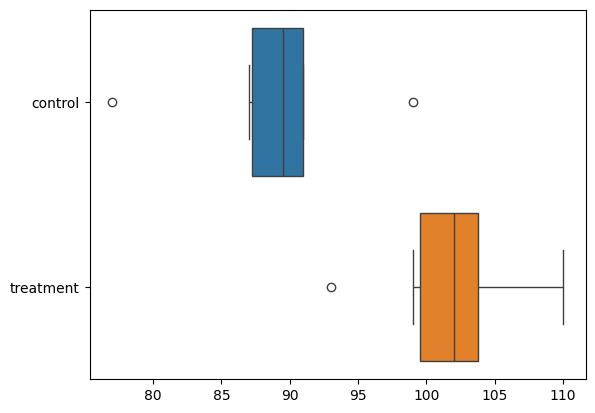

In [ ]:
# Sample:
control = np.array([91, 87, 99, 77, 88, 91])
treatment = np.array([101, 110, 103, 93, 99, 104])
# Visualization:
sns.boxplot(
    data=pd.DataFrame({'control': control, 'treatment': treatment}),
    orient='h');

##Example 2

temperatures = pd.DataFrame(data={
  'time1': [65, 87, 59, 71, 58, 74, 55, 98, 62, 53, 84, 63, 78, 62, 60],
  'time2': [82, 91, 86, 83, 85, 51, 65, 61, 76, 65, 53, 70, 51, 55, 68]
})

sns.boxplot(
    data=pd.DataFrame({'time1': temperatures['time1'], 'time2': temperatures['time2']}),
    orient='h');

The population mean for patients in the control group is notated $\mu_1$, for those in the treatment group $\mu_2$.

The hypotheses are:

- $H_0$: $\mu_1 - \mu_2 = 0$ (reaction time is the same in both groups)
- $H_1$: $\mu_1 - \mu_2 < 0$ (reaction time is significantly higher in the treatment group compared to the control group)

In Python, we can use the `ttest_ind()` function from `scipy.stats`. Parameters `a` and `b` are the two groups to be compared. `alternative='less'` indicates that we want to test for the alternative hypothesis that the mean of the control group is less than the mean of the treatment group. Finally, by setting `equal_var=False`, it is *not* assumed that both groups have the same standard deviation.

In [ ]:
# using alternative ='less' -> left tailed check
# using alternative ='greater' -> right tailed check
# using nothing for alternative is a 2 tailed test

stats.ttest_ind(a=control, b=treatment,
    alternative='less', equal_var=False)

The $p$-value is very small, which means that, if the null hypothesis would be correct, it is highly unlikely to observe the differences between the two groups. Consequently, we reject the null hypothesis. Based on the sample, there is reason to conclude that the drug does indeed have a significant impact on reaction speed.

### The t-test for paired samples

In this variant of the $t$-test, a measurement is taken on each element of the sample, one time before and one time after an intervention. The aim is to determine whether the intervention had a significant effect on the measurement.

**Case:** A study examined whether cars that run on petrol with additives also have a lower consumption. Ten cars were first filled with either regular gasoline or gasoline with additives (determined by tossing a coin), after which consumption was measured (expressed in miles per gallon). The cars were then refueled with the other type of petrol and consumption was measured again.

We use a paired $t$ test to determine whether cars are significantly more economical on gasoline with additives.

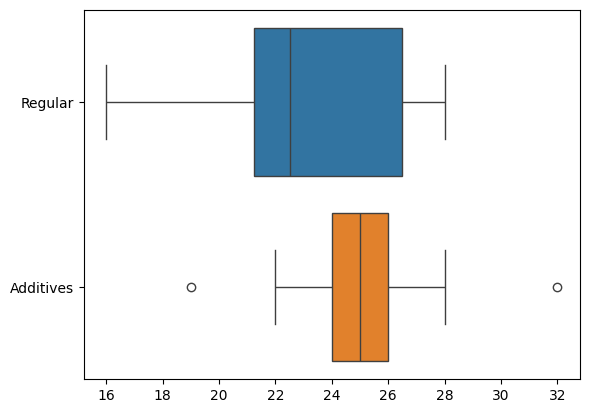

In [19]:
# Measurements
regular =   np.array([16, 20, 21, 22, 23, 22, 27, 25, 27, 28])
additives = np.array([19, 22, 24, 24, 25, 25, 26, 26, 28, 32])
# Visualization
sns.boxplot(
    data={'Regular': regular, 'Additives': additives}, 
    orient='h');

In [ ]:
# using alternative ='less' -> left tailed check
# using alternative ='greater' -> right tailed check
# using nothing for alternative is a 2 tailed test

stats.ttest_rel(regular, additives, alternative='less')

TtestResult(statistic=np.float64(-4.47213595499958), pvalue=np.float64(0.00077494295585091), df=np.int64(9))

We use `alternative='less'` because we want to check whether the mileage per gallon on regular fuel is smaller than on fuel with additives.

The $p$-value, 0.0007749, is very small. Even with an $\alpha = 0.01$, we can reject the null hypothesis. According to this sample, we have reasons to assume that the fuel with additives indeed leads to significantly lower fuel consumption.


#### Cohen's $d$
Effect size* is another metric to express the magnitude of the difference between two groups. Several definitions of effect size exist, but one of the most commonly used is *Cohen's $d$*.

*Cohen's $d$* is in particular used in research in education to evaluate what factors influence learning outcomes for students. Factors include learning and teaching strategies, use of technology, classroom management, student and teacher attributes, etc.


Cohen's $d$ is defined as the difference between the means of both groups, divided by a pooled standard deviation. There's no Python function for calculating Cohen's $d$ readily available, so we define it here, according to the formula:

In [ ]:
def cohen_d(a, b):
    na = len(a)
    nb = len(b)
    pooled_sd = np.sqrt( ((na-1) * np.var(a, ddof=1) +
                          (nb-1) * np.var(b, ddof=1)) / (na + nb - 2) )
    return (np.mean(b) - np.mean(a)) / pooled_sd

In [ ]:
# Effect size of additives in gasoline:
cohen_d(regular, additives)

### The chi-squared test for independence

To answer the question of when the value of chi-square is sufficient to assume an association between two variables, we can use the *chi-square independence test*.

The chi-squared distribution

The value of $\chi^2$ follows a specific stochastic distribution that is called the $\chi^2$-distribution. Just like with the Student-t distribution, the shape of the probability density function depends on the degrees of freedom, which in this context is $df = (r-1)\times(k-1)$ (with $r$ the number of rows in the contingency table and $k$ the number of columns).

The code below plots the probability density function of the $\chi^2$-distribution for a number of degrees of freedom:

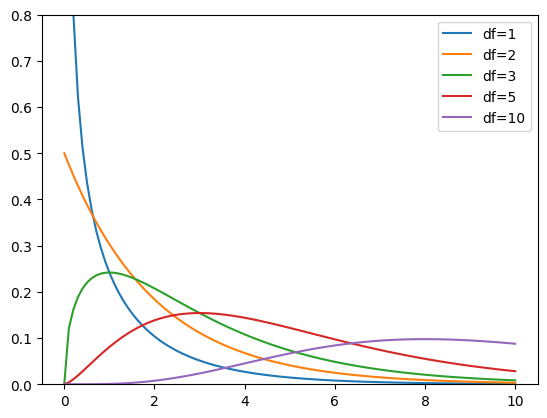

In [4]:
# Plot of the chi-squared distribution for different degrees of freedom
x = np.linspace(0, 10, num=100)
fig, tplot = plt.subplots(1, 1);
tplot.set_ylim([0, 0.8]);
tplot.plot(x, stats.chi2.pdf(x, 1), label="df=1");
tplot.plot(x, stats.chi2.pdf(x, 2), label="df=2");
tplot.plot(x, stats.chi2.pdf(x, 3), label="df=3");
tplot.plot(x, stats.chi2.pdf(x, 5), label="df=5");
tplot.plot(x, stats.chi2.pdf(x, 10), label="df=10");
tplot.legend(loc='best');

Using this figure, you can follow a reasoning similar to a right-sided z-test. You can calculate a critical value $g$ for which the area under the curve to the right of $g$ is equal to our chosen significance level $\alpha$. If the test statistic $\chi^2$ is greater than $g$, we say that the deviations from the expected values in the contingency table are too large to be coincidental and that we have reason to believe that there is an association between the two variables.

You can also calculate the excess probability $p$, i.e. the probability that the deviations you see in the sample could be due to random sampling errors. To do this, you calculate the area under the density curve to the right of $p$. If this area is smaller than $\alpha$, we also say that the deviations are too large to be caused by random sampling errors and that there is therefore an association between the variables.

In Python, we use the following Scipy functions for this purpose:

- `stats.chi2.sf(x)` - the right tail probability of `x` (or survival function)
- `stats.chi2.isf(q)` - the inverse function of `sf(x)`, i.e. calculate a number `x` for which the right tail probability is exactly `q`.

A plot for the case where $\alpha = 0.05$ (an often chosen value for the significance level) and 4 degrees of freedom:

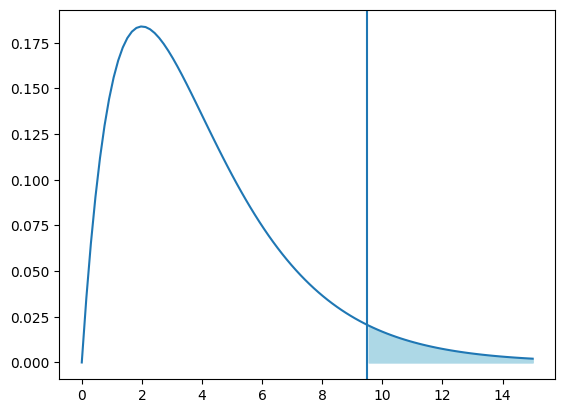

In [5]:
# Right tail probability in the chi-squared distribution

# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=4)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(.05, df=4)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                      # probability density
tplot.fill_between(x, y, where=x>=q,  # critical area
    color='lightblue')
tplot.axvline(q);                     # critical value

#### Test procedure

Formally, the procedure of the $\chi^2$ test for independence runs as follows:

1. Formulate the hypotheses:
   - $H_0$: There is no association between the variables (the differences between observed and expected values are small)
   - $H_1$: There is an association between the variables (the differences are large)
2. Choose significance level $\alpha$
3. Calculate the value of the test statistic in the sample (here: $\chi^2$).
4. Use one of the following methods (based on the degrees of freedom $df = (r-1) \times (k-1)$):
   1. Determine critical value $g$ so $P(\chi^2 > g) = \alpha$
   2. Calculate the $p$-value
5. Draw a conclusion based on the outcome:
   1. $\chi^2 < g$: do not reject $H_0$; $\chi^2 > g$: reject $H_0$
   2. $p > \alpha$: do not reject $H_0$; $p < \alpha$: reject $H_0$

In Python, we can calculate this as follows:

In [ ]:
rlanders = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])
rlanders.Gender = rlanders.Gender.astype('category')
likert_scale = CategoricalDtype(categories=[1,2,3,4,5], ordered=True)
rlanders.Survey = rlanders.Survey.astype(likert_scale)

In [10]:
# Chi-squared test for independence based on a contingency table
observed = pd.crosstab(rlanders.Survey, rlanders.Gender)
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

Chi-squared       : 4.2555
Degrees of freedom: 4
P-value           : 0.3725


As you can see, the outcome for the $p$-value is the same as in our worked out calculations!

A graphical representation of our case:

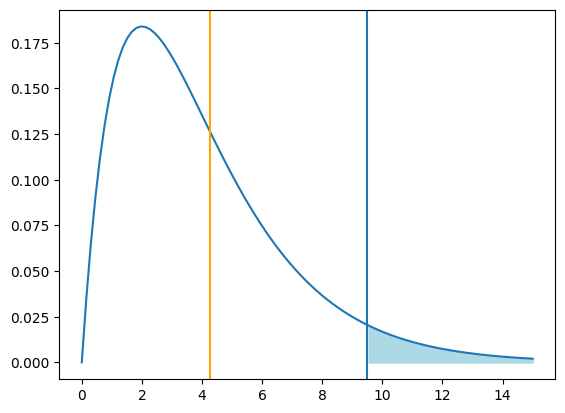

In [11]:
# Is there an association between Gender and Survey?

# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=4)  # TODO: CHECK this!

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

We see that $\chi^2$ is well within the region of acceptance. The $p$-value is also greater than $\alpha$. Consequently, we cannot reject the null hypothesis and conclude that, based on this sample, there is no reason to believe that there is a significant difference between women's and men's answers to the survey question.

### Goodness-of-fit test


Suppose that in a sample of superheroes we keep track of what type they are and that we also know how often each type occurs in the entire population (as a percentage). Given below are the absolute frequencies in the sample $o_i$ and the expected relative frequencies $\pi_i$ in the population:

In [13]:
types =               ['mutant', 'human', 'alien', 'god', 'demon']
observed =   np.array([   127,      75,      98,     27,     73])
expected_p = np.array([   .35,     .17,     .23,    .08,    .17])

The question now is: is this sample representative of the population? Does each type occur in the sample in proportion to the expected percentage in the population as a whole?


Test procedure

To answer these kinds of questions, a goodness-of-fit test is suitable. The procedure is as follows:

1. Formulate the hypotheses:
   - $H_0$: The sample is representative of the population, i.e. the frequency of each class within the sample corresponds well to that in the population.
   - $H_1$: The sample is *not* representative of the population, i.e. the differences with the expected frequencies are too large.
2. Choose significance level $\alpha$
3. Calculate the value of the test statistic in the sample (here: $\chi^2$).
4. Use one of the following methods (based on the degrees of freedom $df = (k-1)$ with $k$ the number of categories in the sample):
   1. Determine critical value $g$ so $P(\chi^2 > g) = \alpha$
   2. Calculate the $p$-value
5. Draw a conclusion based on the outcome:
   1. $\chi^2 < g$: do not reject $H_0$; $\chi^2 > g$: reject $H_0$
   2. $p > \alpha$: do not reject $H_0$; $p < \alpha$: reject $H_0$

A plot of this case, including the calculation of $p$ and $g$:

In [14]:
alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 400
k = 5; df = 4
Chi-squared        χ² = 3.4679
Critical value      g = 9.4877
p-value             p = 0.4828


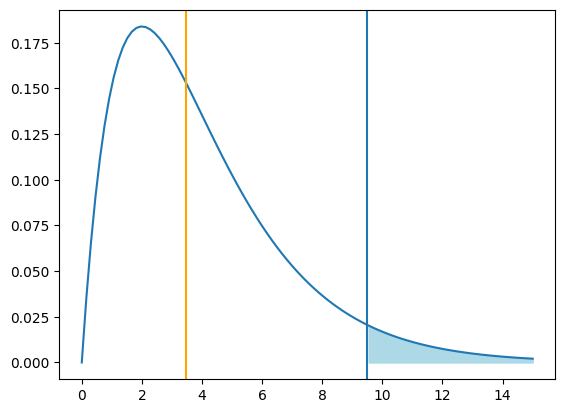

In [15]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange'); # chi-squared

We can see that $\chi^2$ in the sample is left of the critical value, so within the area of acceptance. Therefore, we cannot reject the null hypothesis and conclude that the sample is representative for the population, at least w.r.t. the types of superheroes.


<a id='reg'></a>
## 6  Simple Linear Regression


### 6.1   Pearson's product-moment correlation coefficient / R
Covariance measures the direction of a linear relationship between two
numerical variables. If this straight line rises from left to right, the relationship
is positive and the covariance will be a positive number. If it falls from left to right,
the relationship is negative and the covariance will be a negative number.

Cov > 0: increasing  
Cov ≈ 0: no relationship  
Cov < 0: decreasing 

ways to solve it :

In [3]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables for each gender.

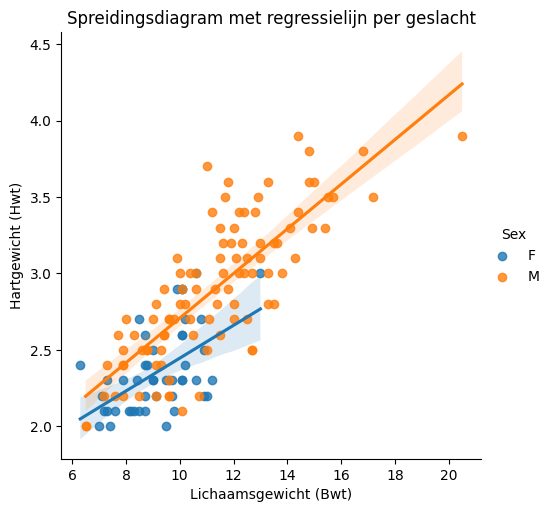

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='Bwt', y='Hwt', hue='Sex', data=cats)  # zonder hue is het voor allemaal aka opsplits var
plt.xlabel('Lichaamsgewicht (Bwt)')
plt.ylabel('Hartgewicht (Hwt)')
plt.title('Spreidingsdiagram met regressielijn per geslacht')
plt.show()


3. Calculate and draw the regression line.

In [ ]:
from sklearn.linear_model import LinearRegression

cats_B = cats.Bwt.values.reshape(-1,1)
cats_H = cats.Hwt

weight_model = LinearRegression().fit(cats_B, cats_H)

print(f"Regression line: ŷ = {weight_model.intercept_:.4f} + {weight_model.coef_[0]:.4f} x")


### bij opsliten bv op sex :

from scipy import stats

# Voor mannetjes
males = cats[cats['Sex'] == 'M']
weight_model_M = LinearRegression().fit(males['Bwt'].values.reshape(-1,1), males['Hwt'])

print(f"Regression line: ŷ = {weight_model_M.intercept_:.4f} + {weight_model_M.coef_[0]:.4f} x")

# Voor vrouwtjes
females = cats[cats['Sex'] == 'F']

weight_model_F = LinearRegression().fit(females['Bwt'].values.reshape(-1,1), females['Hwt'])

print(f"Regression line: ŷ = {weight_model_F.intercept_:.4f} + {weight_model_F.coef_[0]:.4f} x")

Regression line: ŷ = 1.0187 + 0.1604 x
Regression line: ŷ = 1.2479 + 0.1459 x
Regression line: ŷ = 1.3715 + 0.1074 x


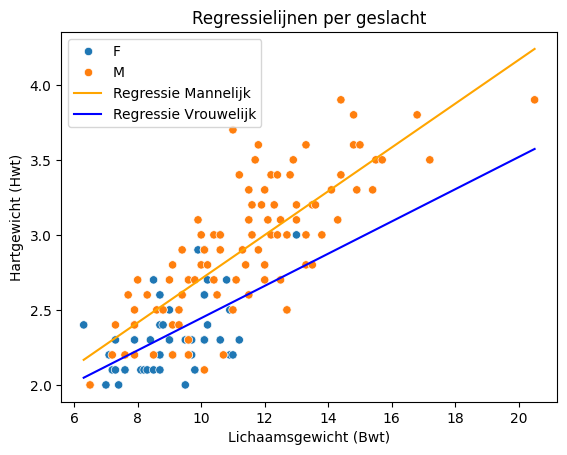

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Plot de punten gekleurd per geslacht
sns.scatterplot(data=cats, x='Bwt', y='Hwt', hue='Sex')

# Genereer waarden voor x-as
x_vals = np.linspace(cats['Bwt'].min(), cats['Bwt'].max(), 100)

# Voorspel y-waarden voor mannetjes en vrouwtjes
y_pred_m = weight_model_M.intercept_ + weight_model_M.coef_[0] * x_vals
y_pred_f = weight_model_F.intercept_ + weight_model_F.coef_[0] * x_vals

# Teken de regressielijnen
plt.plot(x_vals, y_pred_m, color='orange', label='Regressie Mannelijk')
plt.plot(x_vals, y_pred_f, color='blue', label='Regressie Vrouwelijk')

# Aanduidingen
plt.xlabel('Lichaamsgewicht (Bwt)')
plt.ylabel('Hartgewicht (Hwt)')
plt.title('Regressielijnen per geslacht')
plt.legend()
plt.show()


4. Calculate the correlation coefficient and the coefficient of determination.


In [ ]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(cats['Bwt'], cats['Hwt'])
r = r_value             #correlation coefficient
r_squared = r**2        #coefficient of determination

print(r ,r_squared)

# r = 0.80 → sterke correlatie
# r² = 0.64 → 64% van variantie verklaard /64% van de variatie in Hwt verklaard wordt door Bwt.


## of bij opslpitsing
slope_m, intercept_m, r_m, _, _ = stats.linregress(males['Bwt'], males['Hwt'])

print(r_m ,r_m**2)

# Voor vrouwtjes
slope_f, intercept_f, r_f, _, _ = stats.linregress(females['Bwt'], females['Hwt'])

print(r_f ,r_f**2)


0.804134787315513 0.6466327561709654
0.7930443171812301 0.6289192890134435
0.5320496665060396 0.28307684762918794


bepalen van waarde op een aantal 

In [23]:
lijn_m = f"Hwt = {intercept_m:.2f} + {slope_m:.2f} * Bwt"
lijn_f = f"Hwt = {intercept_f:.2f} + {slope_f:.2f} * Bwt"

#vb op btw van 70 wat is de Hwt:

deHwt = round(intercept_m,2) + round(slope_m,2)* 70 #-> Bwt
deHwt

np.float64(11.75)

### Interpretation of R and R²

Depending on the value of $|R|$ (or $R^2$), you can draw a conclusion about the strength of the linear relation between the two variables:

| $abs(R)$  |  $R^2$   | Explained variance |   Linear relation    |
| :-------: | :------: | :----------------: | :------------------: |
|   < .3    |   < .1   |       < 10%        |      very weak       |
|  .3 - .5  | .1 - .25 |     10% - 25%      |         weak         |
|  .5 - .7  | .25 - .5 |     25% - 50%      |       moderate       |
| .7 - .85  | .5 - .75 |     50% - 75%      |        strong        |
| .85 - .95 | .75 - .9 |     75% - 90%      |     very strong      |
|   > .95   |   > .9   |       > 90%        | exceptionally strong |

**Remark** that the value of $R$ doesn't say anything about the steepness of the regression line! It only indicates how close the observations are to the regression line. Therefore, it is **wrong** to say that a value of e.g. $R = 0.8$ indicates a strongly increasing linear relation! Instead, you should say it indicates an _increasing and strong linear relation_.

<a id='ts'></a>
## 7  Time‑Series Forecasting

| Nr | Vraagtype                                      | Uitleg                                                                                                         | Methode / model                                | Wanneer wel / niet gebruiken                                                                      |
| -- | ---------------------------------------------- | -------------------------------------------------------------------------------------------------------------- | ---------------------------------------------- | ------------------------------------------------------------------------------------------------- |
| 1  | **Trend zonder voorspelling (smoothing)**      | Je wil het algemene verloop van de tijdreeks zichtbaar maken, zonder iets te voorspellen                       | **SMA (Simple Moving Average)**                | ✔ Goed voor grafieken / trends<br>✘ Niet gebruiken voor voorspelling (kijkt ook naar toekomst)    |
| 2  | **Snellere trend (gewichtige smoothing)**      | Je wil trends, maar recente waarden moeten meer wegen dan oudere                                               | **EMA (Exponential Moving Avg)**               | ✔ Geschikt voor korte termijn / snel reagerende trends<br>✔ Wordt vaak gebruikt bij trading       |
| 3  | **Voorspelling zonder trend/seizoen**          | Je hebt een redelijk stabiele reeks zonder grote pieken of dalingen                                            | **SES (Single Exp. Smoothing)**                | ✔ Alleen gebruiken als je *géén* trend of seizoen vermoedt<br>✘ Niet robuust bij trendmatige data |
| 4  | **Voorspelling met trend, zonder seizoen**     | Je ziet dat het gemiddeld niveau stijgt/daalt over tijd, maar zonder vaste jaarlijkse of maandelijkse patronen | **DES (Double Exponential Smoothing)**         | ✔ Goed bij continue stijging/daling<br>✘ Niet geschikt als er een seizoenspatroon is              |
| 5  | **Voorspelling met trend en seizoen**          | Je hebt regelmatige pieken en dalen (bijv. elk jaar in de zomer of rond Kerst) *en* een trend                  | **TES (Triple Exp. Smoothing / Holt-Winters)** | ✔ Als er duidelijke seizoensinvloed is (bv. verkoop stijgt in zomer)                              |
| 6  | **Uitzonderingen detecteren / interpreteren**  | Je wil afwijkende maanden of onregelmatigheden in kaart brengen                                                | **Seizoensdecompositie**                       | ✔ Zeer geschikt om plotselinge pieken of dalen te verklaren<br>✘ Niet voor voorspelling           |
| 7  | **Voorspelling evalueren (kwaliteit checken)** | Je wil weten hoe goed je model presteert in het voorspellen van echte data                                     | **MAE, MSE, RMSE**                             | ✔ Gebruik na elke voorspelling<br>✔ Makkelijk te vergelijken tussen modellen,   laag = goed.                     |



### opslitsen training en test data

In [ ]:
#voorbeeld Splits de data (train: 1998–2018, test: 2019–2022)

dfpacht = pd.DataFrame(data={
    'jaar': [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'prijs': [180, 185, 188, 189, 197, 200, 203, 208, 210, 215, 225, 229, 233, 242, 248, 257, 291, 299, 301, 309, 305, 304, 310, 322, 329]
}).set_index('jaar')
dfpacht.head()

train = dfpacht.loc[1998:2018]
test = dfpacht.loc[2019:2022]


#voorbeeld Splits de data (train: alles tot rij 21, test: alles na rij 21)

train = dfpacht['prijs'].iloc[:21]  # eerste 21 rijen → 1998 t.e.m. 2018
test = dfpacht['prijs'].iloc[21:]  # resterende rijen → 2019 t.e.m. 2022

# [:-12] → selecteert alle maanden behalve de laatste 12 → training set
# [-12:] → selecteert de laatste 12 maanden → test set

train = wounded_data.number_of_heavily_wounded[:-12]
test = wounded_data.number_of_heavily_wounded[-12:]




#voorspelling maken from statsmodels.tsa.api import Holt

model = gekozenmodel(train).fit()
voorspelling = model.forecast(len(test))



## kijken vanaf welk jaar prijs >= dan 500


prijs500 = model.forecast(200)
antwoord = prijs500[prijs500 >=500].index[0]




### Moving Average

<a id='ts_hw'></a>
### 7.1  Simple Moving Average - SMA

In [ ]:
import pandas as pd  

wounded_data = pd.read_csv(
    'https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/number_of_heavily_wounded_car_accidents_VL.txt',
    delimiter = "\t",
    parse_dates=['date']).set_index(['date'])
# Add frequency info to the index
wounded_data.index = pd.DatetimeIndex(wounded_data.index, freq='MS')


wounded_data['SMA3'] = wounded_data['number_of_heavily_wounded'].rolling(3).mean().shift(1)
wounded_data['SMA5'] = wounded_data['number_of_heavily_wounded'].rolling(5).mean().shift(1)
wounded_data['SMA10'] = wounded_data['number_of_heavily_wounded'].rolling(10).mean().shift(1)
wounded_data


,number_of_heavily_wounded,SMA3,SMA5,SMA10
date,,,,
2013-01-01,285,NaN,NaN,NaN
2013-02-01,276,NaN,NaN,NaN
2013-03-01,332,297.666667,NaN,NaN
2013-04-01,381,329.666667,NaN,NaN
2013-05-01,393,368.666667,333.4,NaN
...,...,...,...,...
2022-08-01,303,316.333333,324.2,279.9
2022-09-01,306,302.000000,326.4,287.5
2022-10-01,290,299.666667,309.0,293.4


<a id='ts_hw'></a>
### 7.2  Single Exponential Smoothing - SES ook wel genoemd Exponentional moving avargae EMA


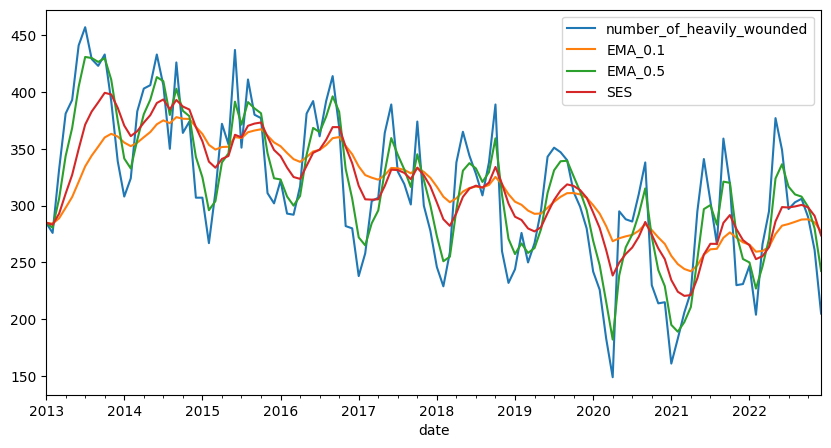

In [ ]:
import pandas as pd  

wounded_data = pd.read_csv(
    'https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/number_of_heavily_wounded_car_accidents_VL.txt',
    delimiter = "\t",
    parse_dates=['date']).set_index(['date'])
# Add frequency info to the index
wounded_data.index = pd.DatetimeIndex(wounded_data.index, freq='MS')

wounded_data['EMA_0.1'] = wounded_data['number_of_heavily_wounded'].ewm(alpha=.1, adjust=False).mean()
wounded_data['EMA_0.5'] = wounded_data['number_of_heavily_wounded'].ewm(alpha=.5, adjust=False).mean()


#dit is beter en laat ons toe dubbel en triple te doen 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Train the model
data_ses = SimpleExpSmoothing(wounded_data['number_of_heavily_wounded']).fit(
    smoothing_level=0.2, optimized=False)

# Add fitted values to the dataframe
wounded_data['SES'] = data_ses.level
wounded_data.head(20)

wounded_data.plot(y=['number_of_heavily_wounded',  'EMA_0.1', 'EMA_0.5','SES'], figsize=[10,5]);


<a id='ts_hw'></a>
### 7.3  Double Exponential Smoothing DES - methode van Holt

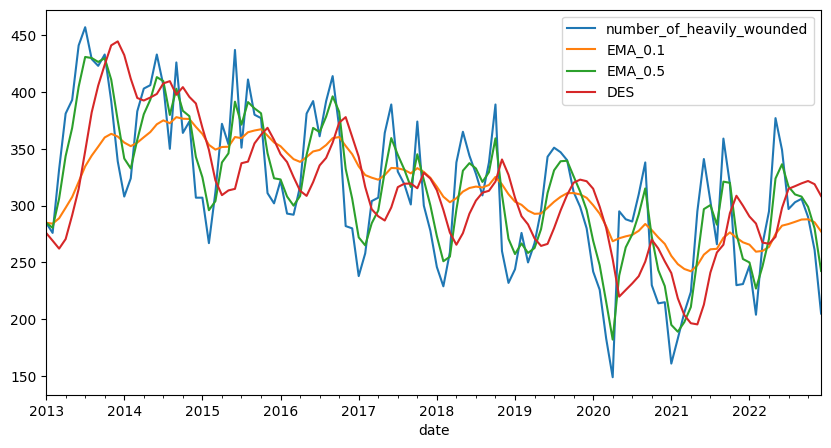

In [21]:
import pandas as pd  

wounded_data = pd.read_csv(
    'https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/number_of_heavily_wounded_car_accidents_VL.txt',
    delimiter = "\t",
    parse_dates=['date']).set_index(['date'])
# Add frequency info to the index
wounded_data.index = pd.DatetimeIndex(wounded_data.index, freq='MS')

wounded_data['EMA_0.1'] = wounded_data['number_of_heavily_wounded'].ewm(alpha=.1, adjust=False).mean()
wounded_data['EMA_0.5'] = wounded_data['number_of_heavily_wounded'].ewm(alpha=.5, adjust=False).mean()


from statsmodels.tsa.api import Holt

# Train the model
data_des = Holt(wounded_data['number_of_heavily_wounded']).fit(
    smoothing_level=0.2,smoothing_trend= .2, optimized=False)


# Add fitted values to the dataframe
wounded_data['DES'] = data_des.fittedvalues
wounded_data.head(20)

wounded_data.plot(y=['number_of_heavily_wounded',  'EMA_0.1', 'EMA_0.5','DES'], figsize=[10,5]);

<a id='ts_hw'></a>
### 7.4  Triple Exponentional Smoothing TES - Holts winter

*Additive*: season size **constant** (e.g. +10 units every December). 
 

*Multiplicative*: season size **proportional** (e.g. ×1.10 every December).

**Rule of thumb:**
- If seasonal peaks/troughs increase as the level grows → *multiplicative*.
- Otherwise → *additive*.

Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

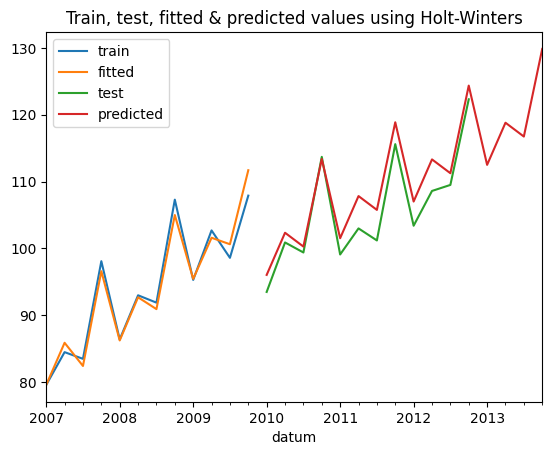

In [ ]:
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd 

df = pd.DataFrame(data={
    'datum': ['2007/01/01', '2007/04/01', '2007/07/01', '2007/10/01', '2008/01/01', '2008/04/01', '2008/07/01', '2008/10/01','2009/01/01', '2009/04/01', '2009/07/01', '2009/10/01','2010/01/01', '2010/04/01', '2010/07/01', '2010/10/01','2011/01/01', '2011/04/01', '2011/07/01', '2011/10/01','2012/01/01', '2012/04/01', '2012/07/01', '2012/10/01'],
    'kwartaal': ['2007-1','2007-2','2007-3','2007-4','2008-1','2008-2','2008-3','2008-4','2009-1','2009-2','2009-3','2009-4','2010-1','2010-2','2010-3','2010-4','2011-1','2011-2','2011-3','2011-4','2012-1','2011-2','2011-3','2011-4'],
    'omzet': [79.6,84.5,83.5,98.1,86.4,93,91.9,107.3,95.3,102.7,98.6,107.9,93.5,100.9,99.4,113.7,99.1,103,101.2,115.6,103.4,108.6,109.5,122.3]
})

df['datum']= pd.to_datetime(df['datum']) 
df = df.set_index('datum')
df.index.freq = 'QS'  #-> dit naar 'MS' voor maandelijks dan moet seasonal_periods wel naar 12

train = df.omzet[:-12]
test = df.omzet[-12:]

## voor beide trend en season heb je 'add' en 'mul' -> dit betkend 'add' wanneer het steed met een aantal stappen ophoog of beneden gaat
## en 'mul' wnneer de waardes steeds x1.5 ofzo gaan

omzet = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=4).fit()

omzet_predicted = omzet.forecast(16)

train.plot(legend=True, label='train')
omzet.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
omzet_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters')

Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

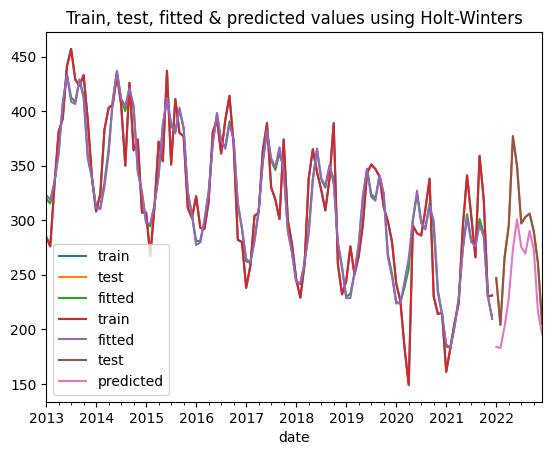

In [24]:
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd 

wounded_data = pd.read_csv(
    'https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/number_of_heavily_wounded_car_accidents_VL.txt',
    delimiter = "\t",
    parse_dates=['date']).set_index(['date'])
# Add frequency info to the index
wounded_data.index = pd.DatetimeIndex(wounded_data.index, freq='MS')

train = wounded_data.number_of_heavily_wounded[:-12]
test = wounded_data.number_of_heavily_wounded[-12:]

wounded_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
(wounded_hw.level + wounded_hw.season).plot(legend=True, label='fitted')

wounded_predicted = wounded_hw.forecast(12)

train.plot(legend=True, label='train')
wounded_hw.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
wounded_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters')


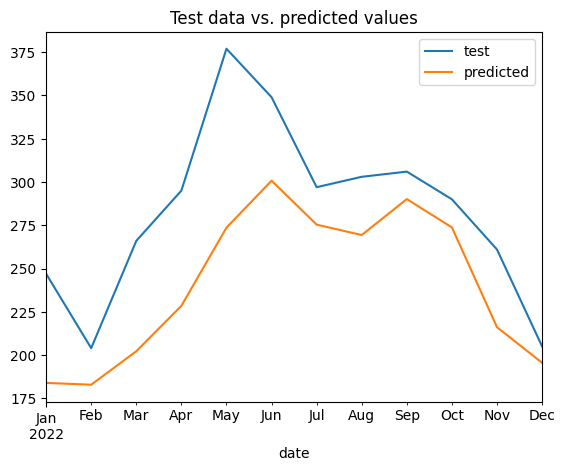

In [ ]:
test.plot(legend=True, label='test');
wounded_predicted.plot(legend=True, label='predicted');
plt.title('Test data vs. predicted values');

### Evaluating the quality of a model

<a id='ts_hw'></a>
### 7.5  gemiddelde gekwadrateerde fout (Mean Squared Error) of gemiddelde absolute fout (Mean Absolute Error).

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE = {mean_absolute_error(test,wounded_predicted)}')
print(f'MSE = {mean_squared_error(test,wounded_predicted)}')

#voorbeeld:
print("Gemiddelde absolute fout voor het 'eenvoudig voortschrijdend gemiddelde van 3 periodes (maanden);",
     round(mean_absolute_error(dataOEF7_01['Houses Sold'], dataOEF7_01['SMA3']), 4), "<huizen>")

MAE = 42.32715070841027
MSE = 2513.5684458892956


In order to evaluate whether our model performs well, we can compare MSE with the variance in the data, or the square root of the MSE with the standard deviation:

In [9]:
import numpy as np
print(f'√MSE  = {np.sqrt(mean_squared_error(test,wounded_predicted))}')
print(f'stdev = {wounded_data.number_of_heavily_wounded.std()}')

√MSE  = 50.135500854078394
stdev = 66.03568341884437


The square root of the MSE is well within one standard deviation of the original data, which is an indicator that the model performs well.


### Decomposing a time series
A data series that shows a long term and seasonal trend can be "decomposed":

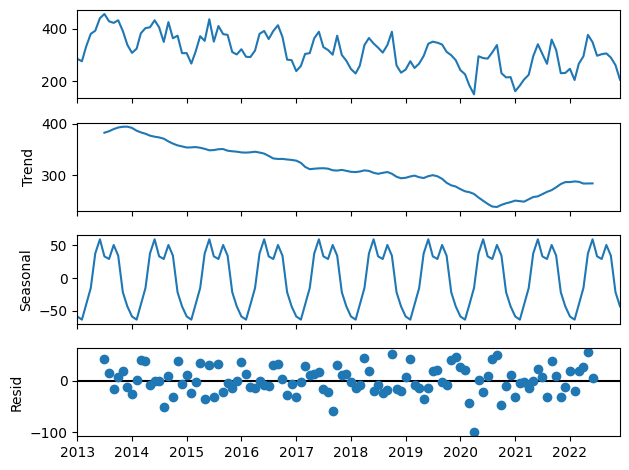

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# remove other columns (e.g. SES, DES, ...)
data = wounded_data[['number_of_heavily_wounded']]

wounded_decomposed = seasonal_decompose(data, model='additive')
wounded_decomposed.plot();

- The top graph shows the observations
- The second graph is the long term trend (which seems to be linear, so the choice for an additive model was appropriate)
- The third graph shows the seasonal trend
- The final graph are the residues

## Welke smoothing op graph

example plot:

/var/folders/ys/2g8tp7f94rj418dvqbs3242r0000gn/T/ipykernel_4708/2576044159.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_index = pd.date_range(start="2018-01", periods=n, freq="M")


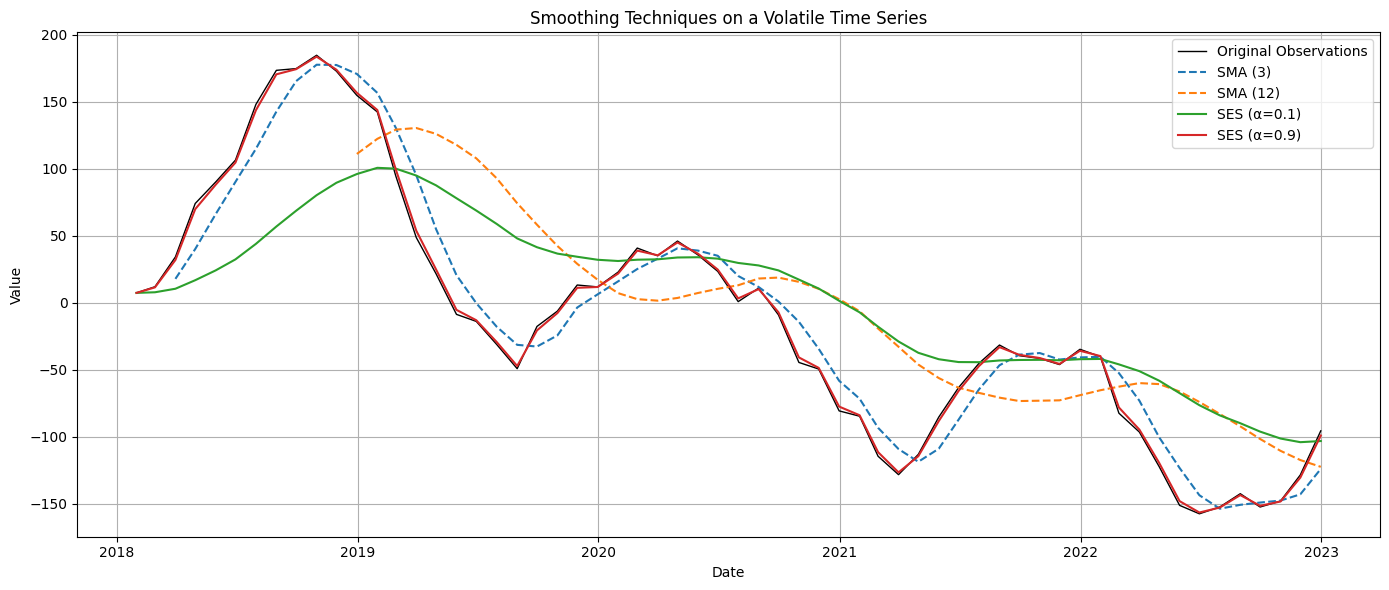

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a volatile time series
np.random.seed(42)
n = 60  # number of months
time_index = pd.date_range(start="2018-01", periods=n, freq="M")
data = np.cumsum(np.random.randn(n) * 15 + np.sin(np.linspace(0, 20, n)) * 20)

# Create a DataFrame
df = pd.DataFrame({'observations': data}, index=time_index)

# Calculate smoothing methods
df['SMA_3'] = df['observations'].rolling(window=3).mean()
df['SMA_12'] = df['observations'].rolling(window=12).mean()
df['SES_01'] = df['observations'].ewm(alpha=0.1, adjust=False).mean()
df['SES_09'] = df['observations'].ewm(alpha=0.9, adjust=False).mean()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(df['observations'], label='Original Observations', color='black', linewidth=1)
plt.plot(df['SMA_3'], label='SMA (3)', linestyle='--')
plt.plot(df['SMA_12'], label='SMA (12)', linestyle='--')
plt.plot(df['SES_01'], label='SES (α=0.1)')
plt.plot(df['SES_09'], label='SES (α=0.9)')
plt.title('Smoothing Techniques on a Volatile Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


| Line              | Method                       | Behavior                      |
| ----------------- | ---------------------------- | ----------------------------- |
| **SMA (3)**       | Short moving average         | Small lag, moderate smoothing |
| **SMA (12)**      | Long moving average          | Big lag, heavy smoothing      |
| **SES (α = 0.1)** | Exponential smoothing (slow) | Tracks long-term trend        |
| **SES (α = 0.9)** | Exponential smoothing (fast) | Follows sharp spikes quickly  |
